In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# read the dataset
df = pd.read_csv('milk_quality_data.csv')

In [4]:
x=df.iloc[ : , : -1]
y=df.iloc[ : , -1 ]
print(x)
print(y)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0     6.6          35      1     0     1          0     254
1     6.6          36      0     1     0          1     253
2     8.5          70      1     1     1          1     246
3     9.5          34      1     1     0          1     255
4     6.6          37      0     0     0          0     255
...   ...         ...    ...   ...   ...        ...     ...
1054  6.7          45      1     1     0          0     247
1055  6.7          38      1     0     1          0     255
1056  3.0          40      1     1     1          1     255
1057  6.8          43      1     0     1          0     250
1058  8.6          55      0     1     1          1     255

[1059 rows x 7 columns]
0         high
1         high
2          low
3          low
4       medium
         ...  
1054    medium
1055      high
1056       low
1057      high
1058       low
Name: Grade, Length: 1059, dtype: object


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=0)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
661   6.5          38      1     0     0          0     255
37    7.4          65      0     0     0          0     255
969   6.7          45      1     1     0          0     247
158   6.7          45      1     1     0          0     247
40    6.8          38      0     0     0          0     255
...   ...         ...    ...   ...   ...        ...     ...
1033  6.6          38      0     0     0          0     255
763   5.6          50      0     1     1          1     255
835   4.7          38      1     0     1          0     255
559   9.0          43      1     0     1          1     250
684   6.5          38      1     0     0          0     255

[794 rows x 7 columns]
661     medium
37         low
969     medium
158     medium
40      medium
         ...  
1033    medium
763        low
835        low
559        low
684     medium
Name: Grade, Length: 794, dtype: object
       pH  Temprature  Taste  Odor  Fat   Turbidity

In [7]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#for coln in df:
  #df[coln]=df[coln].astype(category).cat.codes

<function matplotlib.pyplot.show(*args, **kw)>

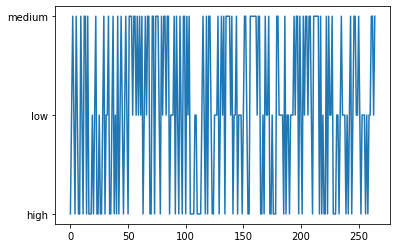

In [9]:
y_pred=classifier.predict(x_test)
plt.plot(y_pred)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

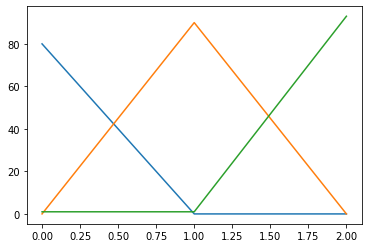

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
plt.plot(cm)
plt.show

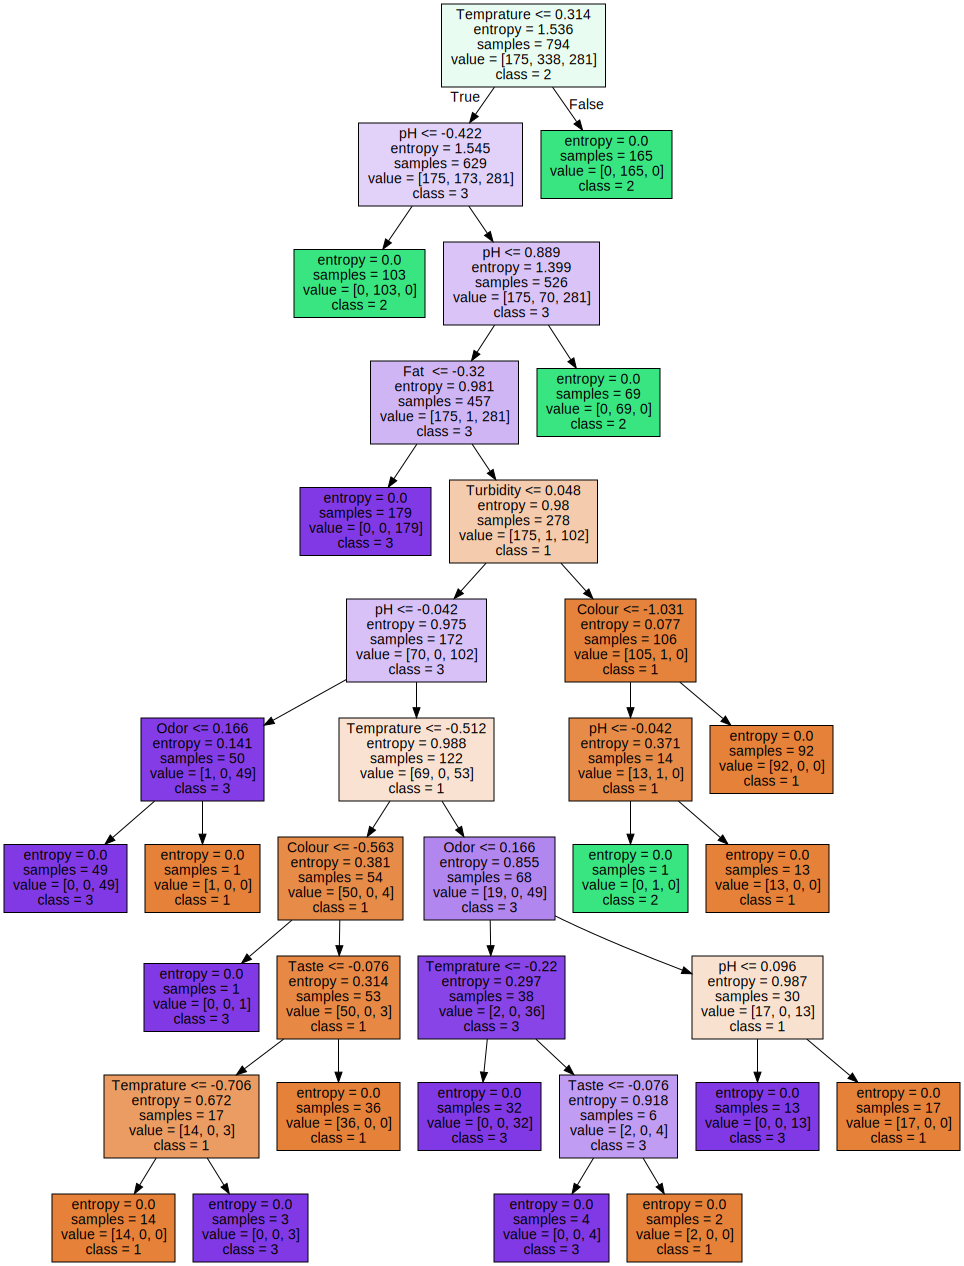

In [11]:
from sklearn.tree import export_graphviz
import graphviz 
graphviz.Source(export_graphviz(classifier,feature_names=x.columns, filled=True, class_names=['1','2','3','4','5','6','7'], out_file=None))